## [作業重點]
使用 Sklearn 中的 Lasso, Ridge 模型，來訓練各種資料集，務必了解送進去模型訓練的**資料型態**為何，也請了解模型中各項參數的意義。

機器學習的模型非常多種，但要訓練的資料多半有固定的格式，確保你了解訓練資料的格式為何，這樣在應用新模型時，就能夠最快的上手開始訓練！

## 練習時間
試著使用 sklearn datasets 的其他資料集 (boston, ...)，來訓練自己的線性迴歸模型，並加上適當的正則化來觀察訓練情形。

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [11]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
data.shape

(506, 13)

In [12]:
target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### Linear Regression

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=42)
linreg = linear_model.LinearRegression()
linreg.fit(x_train, y_train)
y_pred = linreg.predict(x_test)

print('Coefficients: ', linreg.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print("R^2: %.2f"
      % r2_score(y_test, y_pred))

Coefficients:  [-1.19886262e-01  3.99134691e-02  2.12938504e-02  2.77565167e+00
 -1.85854960e+01  3.75579160e+00  4.57076424e-03 -1.47064595e+00
  3.11878023e-01 -1.18109903e-02 -9.47556337e-01  1.03287982e-02
 -5.50096256e-01]
Mean squared error: 15.00
R^2: 0.76


### LASSO

In [14]:
lasso_1 = linear_model.Lasso(alpha=0.1)
lasso_1.fit(x_train, y_train)
y_pred = lasso_1.predict(x_test)

print('Coefficients: ', lasso_1.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print("R^2: %.2f"
      % r2_score(y_test, y_pred))

Coefficients:  [-0.10980546  0.04312477 -0.04391546  0.8916993  -0.          3.64647697
 -0.00609632 -1.15884637  0.28082483 -0.0140987  -0.7617199   0.01107854
 -0.59934   ]
Mean squared error: 15.47
R^2: 0.75


In [15]:
lasso_2 = linear_model.Lasso(alpha=1)
lasso_2.fit(x_train, y_train)
y_pred = lasso_2.predict(x_test)

print('Coefficients: ', lasso_2.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print("R^2: %.2f"
      % r2_score(y_test, y_pred))

Coefficients:  [-0.07680943  0.03881278 -0.          0.         -0.          1.01044741
  0.02415483 -0.64204226  0.27317799 -0.01488284 -0.73971637  0.00922596
 -0.77996817]
Mean squared error: 18.65
R^2: 0.70


### Ridge

In [16]:
ridge_1 = linear_model.Ridge(alpha=0.1)
ridge_1.fit(x_train, y_train)
y_pred = ridge_1.predict(x_test)

print('Coefficients: ', ridge_1.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print("R^2: %.2f"
      % r2_score(y_test, y_pred))

Coefficients:  [-1.19247043e-01  4.01386158e-02  1.57972436e-02  2.74823968e+00
 -1.73335581e+01  3.76406600e+00  3.50478634e-03 -1.45329493e+00
  3.09098171e-01 -1.19192114e-02 -9.33822410e-01  1.03761533e-02
 -5.51792398e-01]
Mean squared error: 14.93
R^2: 0.76


In [17]:
ridge_2 = linear_model.Ridge(alpha=1)
ridge_2.fit(x_train, y_train)
y_pred = ridge_2.predict(x_test)

print('Coefficients: ', ridge_2.coef_)
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred))
print("R^2: %.2f"
      % r2_score(y_test, y_pred))

Coefficients:  [-1.15981972e-01  4.13575632e-02 -1.28777372e-02  2.57386585e+00
 -1.07877514e+01  3.79622099e+00 -1.94226164e-03 -1.36256913e+00
  2.95114394e-01 -1.25075808e-02 -8.62983949e-01  1.06216960e-02
 -5.61553302e-01]
Mean squared error: 14.78
R^2: 0.76


### Comparison

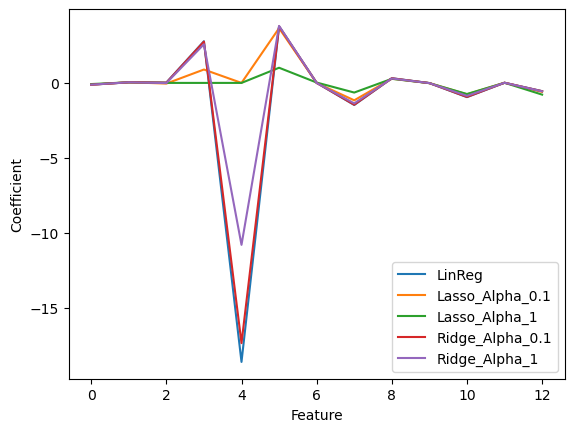

In [22]:
plt.plot(linreg.coef_,label="LinReg")
plt.plot(lasso_1.coef_,label="Lasso_Alpha_0.1")
plt.plot(lasso_2.coef_,label="Lasso_Alpha_1")
plt.plot(ridge_1.coef_,label="Ridge_Alpha_0.1")
plt.plot(ridge_2.coef_,label="Ridge_Alpha_1")
plt.xlabel("Feature")
plt.ylabel("Coefficient")
plt.legend()